In [204]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import os
import shutil

#OUTPUT FOLDER: START FRESH (DELETE OLD ONE IF EXISTS)
output_dir = "../Image/Naive_Bayes_Text/"
if os.path.exists(output_dir) and os.path.isdir(output_dir):
    shutil.rmtree(output_dir)
os.mkdir(output_dir)

In [205]:
df=pd.read_csv("../Data/01-modified-data/cardiovascular_text_final.csv")
df = df[['text','label']]
print(df.shape)
print(df.columns)

(400, 2)
Index(['text', 'label'], dtype='object')


In [206]:
text=[]
y=[]
df['text'] = df['text'].astype(str)
#ITERATE OVER ROWS
# for i in range(0,10):  
for i in range(0,df.shape[0]):
    # QUICKLY CLEAN TEXT
    keep="abcdefghijklmnopqrstuvwxyz0123456789 "
    replace=".,!;"
    tmp=""
    for char in df['text'][i].replace("<br />","").lower():
        if char in replace:
            tmp+=" "
        if char in keep:
            tmp+=char
    tmp=" ".join(tmp.split())
    text.append(tmp)
    # CONVERT STRINGS TO INT TAGS
    if(df["label"][i]==1):
        y.append(1)
    if(df["label"][i]==0):
        y.append(0)

    #PRINT FIRST COUPLE REVIEWS
    if(i<3):
        print(i)
        print(df["text"][i].replace("<br />",""),'\n')
        print(tmp)
        print(df["label"][i],y[i])

0
researchers increasingly find that the effects of infection by sars-cov-2 extend to the cardiovascular system 

researchers increasingly find that the effects of infection by sarscov2 extend to the cardiovascular system
1 1
1
together, ai imaging and ai genetic analysis may be able to help doctors rapidly pinpoint a diagnosis and create a highly personalized treatment plan 

together ai imaging and ai genetic analysis may be able to help doctors rapidly pinpoint a diagnosis and create a highly personalized treatment plan
1 1
2
las enfermedades relacionadas con nuestro sistema cardiovascular se han convertido en el mayor riesgo para nuestra salud, especialmente conforme nuestra edad avanza monitorizar esta salud implica vigilar muchos factores, pero mantener alguno de estos factore… 

las enfermedades relacionadas con nuestro sistema cardiovascular se han convertido en el mayor riesgo para nuestra salud especialmente conforme nuestra edad avanza monitorizar esta salud implica vigilar 

In [207]:
# CONVERT Y TO NUMPY ARRAY
y=np.array(y)

In [208]:
#DOUBLE CHECK SIZE
print(len(text),len(y))

400 400


In [209]:
# PARAMETERS TO CONTROL SIZE OF FEATURE SPACE WITH COUNT-VECTORIZER
# minDF = 0.01 means "ignore terms that appear in less than 1% of the documents". 
# minDF = 5 means "ignore terms that appear in less than 5 documents".
# max_features=int, default=None
#   If not None, build a vocabulary that only consider the top max_features ordered by term frequency across the corpus.

from sklearn.feature_extraction.text import CountVectorizer

def vectorize(corpus,MAX_FEATURES):
    vectorizer=CountVectorizer(max_features=MAX_FEATURES,stop_words="english")   
    # RUN COUNT VECTORIZER ON OUR COURPUS 
    Xs  =  vectorizer.fit_transform(corpus)   
    X=np.array(Xs.todense())
    #CONVERT TO ONE-HOT VECTORS (can also be done with binary=true in CountVectorizer)
    maxs=np.max(X,axis=0)
    return (np.ceil(X/maxs),vectorizer.vocabulary_)

(x,vocab0)=vectorize(text,MAX_FEATURES=10000)

In [210]:
# DOUBLE CHECK SHAPES
print(x.shape,y.shape)

(400, 3622) (400,)


In [211]:
#swap keys and values (value --> ley)
vocab1 = dict([(value, key) for key, value in vocab0.items()])

In [212]:
# CHECK VOCAB KEY-VALUE PAIRS
print(list(vocab1.keys())[0:10])
print(list(vocab1.values())[0:10])

[2732, 1638, 1058, 1649, 2826, 1219, 522, 172, 1607, 1393]
['researchers', 'increasingly', 'effects', 'infection', 'sarscov2', 'extend', 'cardiovascular', 'ai', 'imaging', 'genetic']


In [213]:
# CHECK TO SEE IF COUNT-VECT COLUMNS ARE SORTED BY OCCURRENCE 
print(x.sum(axis=0))

[5. 1. 4. ... 1. 1. 1.]


In [214]:
#RE-ORDER COLUMN SO IT IS SORTED FROM HIGH FREQ TERMS TO LOW 
# https://stackoverflow.com/questions/60758625/sort-pandas-dataframe-by-sum-of-columns
df2=pd.DataFrame(x)
s = df2.sum(axis=0)
df2=df2[s.sort_values(ascending=False).index[:]]
print(df2.head())

   497   914   2179  1510  3119  1798  3130  522   1094  2604  ...  1498  \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0  ...   0.0   
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   1.0   0.0  ...   0.0   
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0  ...   0.0   
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   

   126   1490  1491  1492  1493  1494  1496  1497  3621  
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[5 rows x 3622 columns]


In [215]:
# REMAP DICTIONARY TO CORRESPOND TO NEW COLUMN NUMBERS
print()
i1=0
vocab2={}
for i2 in list(df2.columns):
    # print(i2)
    vocab2[i1]=vocab1[int(i2)]
    i1+=1

#DOUBLE CHECK 
print(vocab2[0],vocab1[497])
print(vocab2[1],vocab1[914])


cancer cancer
diabetes diabetes


In [216]:
# RENAME COLUMNS 0,1,2,3 .. 
df2.columns = range(df2.columns.size)
print(df2.head())
print(df2.sum(axis=0))
x=df2.to_numpy()

   0     1     2     3     4     5     6     7     8     9     ...  3612  \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0  ...   0.0   
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   1.0   0.0  ...   0.0   
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0  ...   0.0   
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   

   3613  3614  3615  3616  3617  3618  3619  3620  3621  
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[5 rows x 3622 columns]
0       59.0
1       46.0
2       37.0
3       37.0
4       30.0
        ... 
3617     1.0
3618     1.0
3619     1.0
3620     1.0
3621     1.0
Length: 3622, dtype: float6

In [217]:
# DOUBLE CHECK 
print(x.shape,y.shape)

(400, 3622) (400,)


In [218]:
import random
random.seed(123)
N=x.shape[0]
l = [*range(N)]     # indices
cut = int(0.8 * N) #80% of the list
random.shuffle(l)   # randomize
train_index = l[:cut] # first 80% of shuffled list
test_index = l[cut:] # last 20% of shuffled list

print(train_index[0:10])
print(test_index[0:10])

[179, 121, 270, 53, 166, 146, 162, 25, 85, 108]
[37, 200, 283, 383, 171, 87, 134, 249, 42, 92]


In [219]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import time

def train_MNB_model(X,Y,i_print=False):

    if(i_print):
        print(X.shape,Y.shape)

    #SPLIT
    x_train=X[train_index]
    y_train=Y[train_index].flatten()

    x_test=X[test_index]
    y_test=Y[test_index].flatten()

    # INITIALIZE MODEL 
    model = MultinomialNB()

    # TRAIN MODEL 
    start = time.process_time()
    model.fit(x_train,y_train)
    time_train=time.process_time() - start

    # LABEL PREDICTIONS FOR TRAINING AND TEST SET 
    start = time.process_time()
    yp_train = model.predict(x_train)
    yp_test = model.predict(x_test)
    time_eval=time.process_time() - start

    acc_train= accuracy_score(y_train, yp_train)*100
    acc_test= accuracy_score(y_test, yp_test)*100

    if(i_print):
        print(acc_train,acc_test,time_train,time_eval)

    return (acc_train,acc_test,time_train,time_eval)


#TEST
print(type(x),type(y))
print(x.shape,y.shape)
(acc_train,acc_test,time_train,time_eval)=train_MNB_model(x,y,i_print=True)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(400, 3622) (400,)
(400, 3622) (400,)
95.3125 55.00000000000001 0.011404000000005965 0.003239000000000658


In [220]:
##UTILITY FUNCTION TO INITIALIZE RELEVANT ARRAYS
def initialize_arrays():
    global num_features,train_accuracies
    global test_accuracies,train_time,eval_time
    num_features=[]
    train_accuracies=[]
    test_accuracies=[]
    train_time=[]
    eval_time=[]

In [221]:
# INITIALIZE ARRAYS
initialize_arrays()

# DEFINE SEARCH FUNCTION
def partial_grid_search(num_runs, min_index, max_index):
    for i in range(1, num_runs+1):
        # SUBSET FEATURES 
        upper_index=min_index+i*int((max_index-min_index)/num_runs)
        xtmp=x[:,0:upper_index]

        #TRAIN 
        (acc_train,acc_test,time_train,time_eval)=train_MNB_model(xtmp,y,i_print=False)

        if(i%5==0):
            print(i,upper_index,xtmp.shape[1],acc_train,acc_test)
            
        #RECORD 
        num_features.append(xtmp.shape[1])
        train_accuracies.append(acc_train)
        test_accuracies.append(acc_test)
        train_time.append(time_train)
        eval_time.append(time_eval)

# DENSE SEARCH (SMALL NUMBER OF FEATURES (FAST))
partial_grid_search(num_runs=100, min_index=0, max_index=1000)

# SPARSE SEARCH (LARGE NUMBER OF FEATURES (SLOWER))
# partial_grid_search(num_runs=20, min_index=1000, max_index=10000)

5 50 50 81.875 75.0


10 100 100 83.4375 76.25
15 150 150 85.9375 72.5
20 200 200 84.6875 71.25
25 250 250 86.5625 70.0
30 300 300 86.5625 67.5
35 350 350 88.4375 67.5
40 400 400 88.75 68.75
45 450 450 89.0625 67.5
50 500 500 88.75 68.75
55 550 550 89.6875 65.0
60 600 600 89.6875 68.75
65 650 650 90.3125 67.5
70 700 700 90.3125 67.5
75 750 750 90.9375 70.0
80 800 800 91.5625 72.5
85 850 850 92.1875 70.0
90 900 900 91.875 70.0
95 950 950 91.875 68.75
100 1000 1000 91.875 68.75


In [222]:
#UTILITY FUNCTION TO SAVE RESULTS
def save_results(path_root):
    out=np.transpose(np.array([num_features,train_accuracies,test_accuracies,train_time,eval_time])) 
    out=pd.DataFrame(out)
    out.to_csv(path_root+".csv")

In [223]:
#UTILITY FUNCTION TO PLOT RESULTS
def plot_results(path_root):

    #PLOT-1
    plt.plot(num_features,train_accuracies,'-or')
    plt.plot(num_features,test_accuracies,'-ob')
    plt.xlabel('Number of features')
    plt.ylabel('ACCURACY: Training (red) and Test (blue)')
    plt.savefig(path_root+'-1.png')
    plt.show()

    # #PLOT-2
    plt.plot(num_features,train_time,'-or')
    plt.plot(num_features,eval_time,'-ob')
    plt.xlabel('Number of features')
    plt.ylabel('Runtime: training time (red) and evaluation time(blue)')
    plt.savefig(path_root+'-2.png')
    plt.show()

    # #PLOT-3
    plt.plot(np.array(test_accuracies),train_time,'-or')
    plt.plot(np.array(test_accuracies),eval_time,'-ob')
    plt.xlabel('test_accuracies')
    plt.ylabel('Runtime: training time (red) and evaluation time (blue)')
    plt.savefig(path_root+'-3.png')
    plt.show()

    # #PLOT-3
    plt.plot(num_features,np.array(train_accuracies)-np.array(test_accuracies),'-or')
    plt.xlabel('Number of features')
    plt.ylabel('train_accuracies-test_accuracies')
    plt.savefig(path_root+'-4.png')
    plt.show()

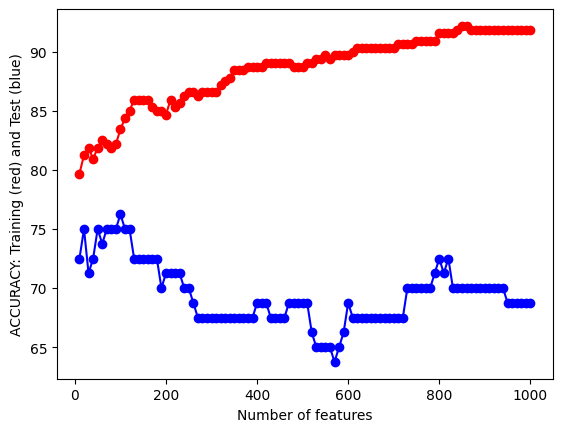

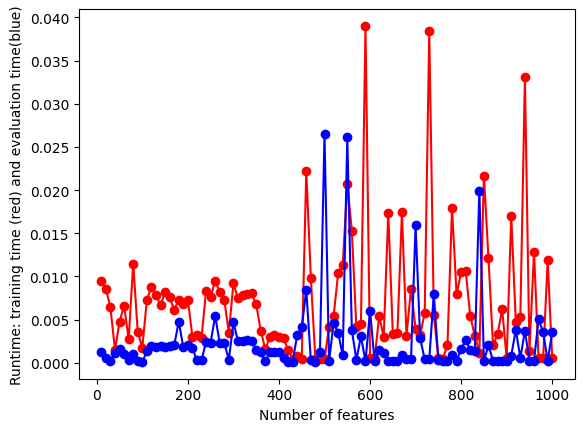

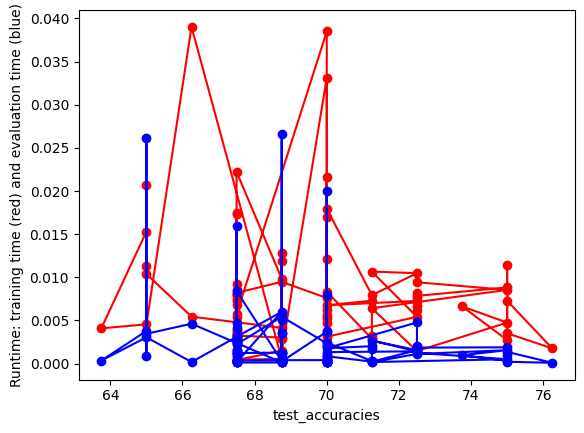

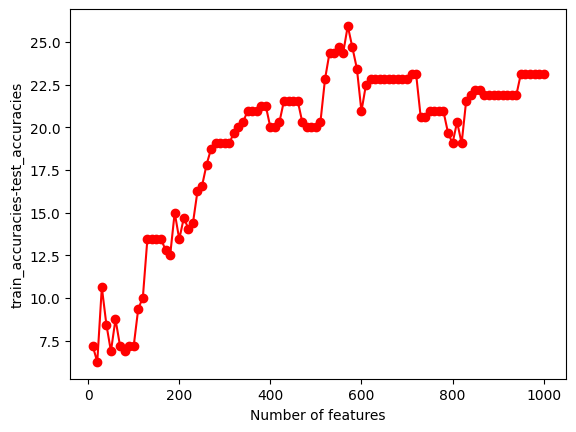

In [224]:
save_results(output_dir+"/partial_grid_search")
plot_results(output_dir+"/partial_grid_search")

In [225]:
#Select the highest test accuracy
max_index = test_accuracies.index(max(test_accuracies))
num_features[max_index]


100

In [226]:
xtmp=x[:,0:1000]
X_train = xtmp[train_index]
y_train = y[train_index].flatten()
X_test = xtmp[test_index]
y_test = y[test_index].flatten()

In [227]:
def train_MNB_model_pred(X,Y,i_print=False):

    if(i_print):
        print(X.shape,Y.shape)

    #SPLIT
    x_train=X[train_index]
    y_train=Y[train_index].flatten()

    x_test=X[test_index]
    y_test=Y[test_index].flatten()

    # INITIALIZE MODEL 
    model = MultinomialNB()

    # TRAIN MODEL 
    model.fit(x_train,y_train)

    # LABEL PREDICTIONS FOR TRAINING AND TEST SET 
    yp_train = model.predict(x_train)
    yp_test = model.predict(x_test)

    return (yp_train,yp_test)

In [228]:
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
def get_metrics(true, preds):
    """
    Takes gold labels and predictions to compute performance metrics
    :param true: array-like object
    :param preds: array-like object
    :return: a tuple of various performance metrics
    """
    accuracy = metrics.accuracy_score(true,preds)
    f1_score = metrics.f1_score(true,preds)
    conf_matrix = metrics.confusion_matrix(true,preds)

    return accuracy, f1_score, conf_matrix

In [229]:
import seaborn as sns
def plot_confusion_matrix(conf_matrix_data, labels, data="train"):
    """
    Takes as input confusion matrix data from get_metrics() and prints out a
    confusion matrix
    :param conf_matrix_data:
    :return: None
    """
    if data == "train":
        plt.title("Training Confusion Matrix")
    else:
        plt.title("Test Confusion Matrix")
    axis = sns.heatmap(conf_matrix_data,annot=True,fmt="d")
    axis.set_xticklabels(labels)
    axis.set_yticklabels(labels)
    axis.set_xlabel("predicted")
    axis.set_ylabel("true")
    plt.show()
    return

In [230]:

y_pred_train,y_pred_test = train_MNB_model_pred(xtmp, y)
acc_train, f1_train, conf_train = get_metrics(y_train, y_pred_train)
acc_test, f1_test, conf_test = get_metrics(y_test, y_pred_test)
print("Training Accuracy:", acc_train)
print("Test Accuracy:", acc_test)
print("Training F1 Score:", f1_train)
print("Test F1 Score:", f1_test)

Training Accuracy: 0.91875
Test Accuracy: 0.6875
Training F1 Score: 0.8375
Test F1 Score: 0.4897959183673469


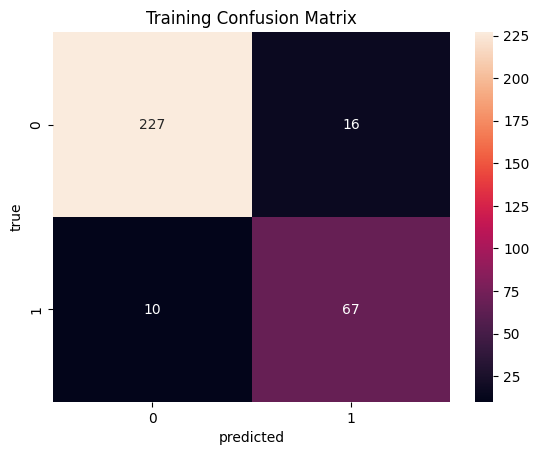

In [231]:
plot_confusion_matrix(conf_train, [0, 1],data="train")

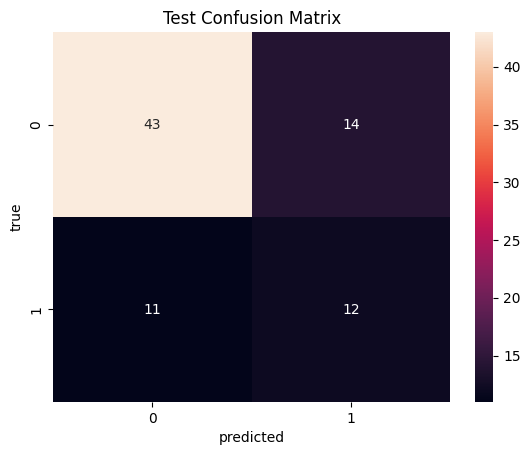

In [232]:
plot_confusion_matrix(conf_test, [0, 1],data="test")